#### 2.1앙상블 학습의 개념
- 여러개분류기(모델) 생성
- 배깅(보팅을 포함함),부스팅
- 안씀

#### 2.1.1 보팅(voting)
- 하드보팅:값으로 나옴
- 소프트보팅: 확률로 나옴(더 정밀함), 대신 속도는 느림, 예측확률 넣어줘야함, 예측확률로 예측확률값 뽑음
- 안씀

#### 2.1.2 배깅
- 배깅은 중요함
- 배깅은 부스팅,배깅이 합쳐진 앙상블 이다~~!!

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble  import RandomForestClassifier
import pandas as pd
import numpy as np

In [ ]:
# 데이터 로딩
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# 학습/테스트 데이터 분리
X_train, X_test,y_train,y_test = train_test_split(
    cancer.data,  #전체데이터
    cancer.target,#전체레이블
    test_size = 0.2 , 
    random_state = 156 
)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(
    random_state = 0,
    max_depth = 8,
    n_jobs = -1 # 코어 하나만 주겟따
                # 병렬처리는 -1  ..근데 속도가 더 느리네.....
                # 데스크탑이 병렬처리들어가면 코어가 적어도 속도 빨라짐!
    
)

rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print(f"정확도:{accuracy_score(y_test,pred):.4f}")
# 튜닝안했는데 0.9561나옴

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' :[1,6,12],
    'min_samples_split' : [2,8,16]

}

grid_cv = GridSearchCV(
    rf_clf,
    param_grid = params,
    cv=5
)

grid_cv.fit(X_train,y_train)

정확도:0.9561


KeyboardInterrupt: 

In [1]:
# human_activity data
# 랜덤포레스트 돌렸을때 어떻게 결과 나오는지
# 노트북만 가지고는 작업 X -> 모듈 만들어야함(함수저장하는 모듈)
# 1.코딩능력 향상  2.논리적 사고(연습많이 필요함)

# import sys
# print(sys.path)
# 주의 'c:\\ProgramData\\anaconda3\\envs\\ml_dev', '',  --> 공백이 있어야함(현재디럭토리에 있다는 뜻!!!!)


# import 하면 원래py파일 수정된게 반영 되지 X, 이전결과가 나올 수 있다.(캐싱때문에) 
# jupyter 효율성을 위해서 모듈을 한번만 임포트하고 캐시에 저장.(수정한 내용이 들어오지 않는다) =>캐시에 저장된 모듈 임포트
# %(매직명령): "주피터"에서(모듈에서X) 사용하는 환경설정,첫째줄에 적어놔야함 --> %autoreload

# %autoreload
import human_dataset as hd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') #경고무시되는데 개발할땐 경고 보는게 좋음


In [2]:
# 데이터 로딩, 분리

X_train, X_test, y_train, y_test = hd.get_human_dataset()
print(X_train.shape)

(7352, 561)


In [3]:
rf_clf = RandomForestClassifier(n_estimators = 1000, random_state= 0, max_depth =8)
rf_clf.fit(X_train,y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# 예측 추출
pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test,pred)
print(f'정확도 : {acc:.4f}') # 시간많이 걸릴때 compile할수 있다~~
                            # 정확도 올라감~~~

정확도 : 0.9186


In [12]:
# 파인튜닝: 미세조정,신경망이 민감해서 미세조정해야함

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,500,1000,1500,2000],
    'max_depth' : [6,8,10,12], #max_depth: 작을수록 아래쪽에 탐색 , 양쪽으로 나올땐 위아래 봐야함
    'min_samples_split' : [8,16,20],
    'min_samples_leaf' : [6,12,18]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5)# CV많이 주면 시간많이 걸림
grid_cv.fit(X_train,y_train)

,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [6, 8, ...], 'min_samples_leaf': [6, 12, ...], 'min_samples_split': [8, 16, ...], 'n_estimators': [100, 500, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [16]:
print(f"정확도:{grid_cv.best_score_}") #학습데이터에 대한 최대정확도이다, 일반적인 것은 X
                                      #랜덤포레스트에서의 정확도: 0.91
                                      # 그래서 그리드 서치써야함
print(f"최적 파라미터:{grid_cv.best_params_}")

정확도:0.9272358569532504
최적 파라미터:{'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 500}


In [25]:
rf_clf1 = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf= 12,
    min_samples_split= 8,
    max_depth=12,
    random_state=0,
    n_jobs=-1
    )

rf_clf1.fit(X_train,y_train) # 피처중요도
pred = rf_clf1.predict(X_test)
print(f"정확도:{accuracy_score(y_test,pred)}")

정확도:0.9209365456396336


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
ftr_top20


53     0.037838
41     0.031347
54     0.030051
560    0.029789
559    0.027375
42     0.027265
57     0.027147
50     0.026039
51     0.023278
58     0.016265
382    0.011624
43     0.011085
87     0.010630
561    0.010581
390    0.010505
52     0.009997
215    0.009968
74     0.009421
76     0.009312
10     0.009262
dtype: float64

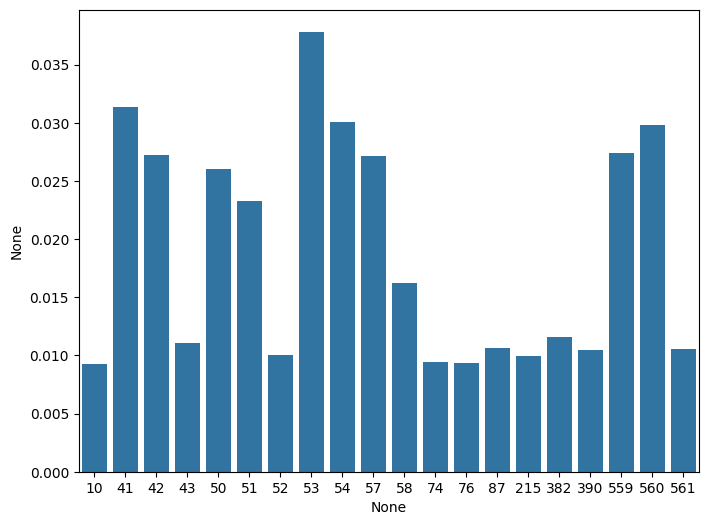

In [ ]:
plt.figure(figsize=(8,6))

# sns.barplot(x=ftr_top20, y=ftr_top20.index)
# sns.barplot(y=ftr_top20,x=ftr_top20.index)

plt.show()